In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load CSV file
file_path = 'Demo_KNN.csv'
data = pd.read_csv(file_path)

# Separate data with and without labels
data_labeled = data.dropna(subset=['Label'])
data_unlabeled = data[data['Label'].isna()]

# Select only the columns that contain numeric values ​​to be resized and normalized (except the Label column).
numeric_columns = data.columns.drop(['uuid', 'Label'])

# Unlabeled data

# 1. Calculate Q1 and Q3 for unlabeled data.
Q1_unlabeled = data_unlabeled[numeric_columns].quantile(0.25)
Q3_unlabeled = data_unlabeled[numeric_columns].quantile(0.75)

# 2. Scale the data using Q1 and Q3.
data_unlabeled_clipped = data_unlabeled.copy()
for col in numeric_columns:
    data_unlabeled_clipped[col] = data_unlabeled[col].clip(lower=Q1_unlabeled[col], upper=Q3_unlabeled[col])

# 3. Perform data normalization for data without labels.
scaler = StandardScaler()
data_unlabeled_standardized = data_unlabeled_clipped.copy()
data_unlabeled_standardized[numeric_columns] = scaler.fit_transform(data_unlabeled_clipped[numeric_columns])

# 4. Perform K-Means clustering for unlabeled data.
kmeans = KMeans(n_clusters=4, random_state=42)
data_unlabeled_standardized['Cluster'] = kmeans.fit_predict(data_unlabeled_standardized[numeric_columns])

# Labeled data

# Standardize labeled data
data_labeled_standardized = data_labeled.copy()
data_labeled_standardized[numeric_columns] = scaler.fit_transform(data_labeled[numeric_columns])

# Perform K-Means clustering for labeled data.
data_labeled_standardized['Cluster'] = kmeans.fit_predict(data_labeled_standardized[numeric_columns])

# Merge unlabeled and labeled data together
data_combined = pd.concat([data_unlabeled_standardized, data_labeled_standardized], ignore_index=True)

# Display the combined data.
data_combined.head(), data_combined.tail()


C:\Users\Pansri San\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pansri San\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(                                   uuid  page_Freq  note_freq  hint_count  \
 0  00417170-6bbb-4b15-aa8c-55bced1f40a3   0.343239  -0.711846    1.521958   
 1  00d442f3-da9c-48f8-a074-f196a28a3813  -0.553654   1.552160   -0.897421   
 2  0146fb06-399e-4e1c-a7ee-30af7af4518f   0.235611  -0.711846   -0.897421   
 3  015e7fac-4cb2-44b4-bae4-a43455f02df2   1.383633   1.552160    1.521958   
 4  01916b76-790c-4150-accc-f43f4f0ab9c4   1.383633  -0.711846   -0.897421   
 
    consistency_score  response_patterns_score  intervals_score  Label  Cluster  
 0          -1.038194                -1.049939         0.104345    NaN        1  
 1          -0.180587                 1.285271         0.104345    NaN        2  
 2          -1.038194                 0.896069         1.386301    NaN        2  
 3           1.417680                 1.285271         1.386301    NaN        0  
 4           0.521091                -1.049939        -1.177610    NaN        3  ,
                                  uui

C:\Users\Pansri San\AppData\Local\Temp\ipykernel_7824\1784726543.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_label['Adjusted Cluster'] = data_with_label['Cluster'].replace({0: 1, 1: 0, 2: 2, 3: 3})


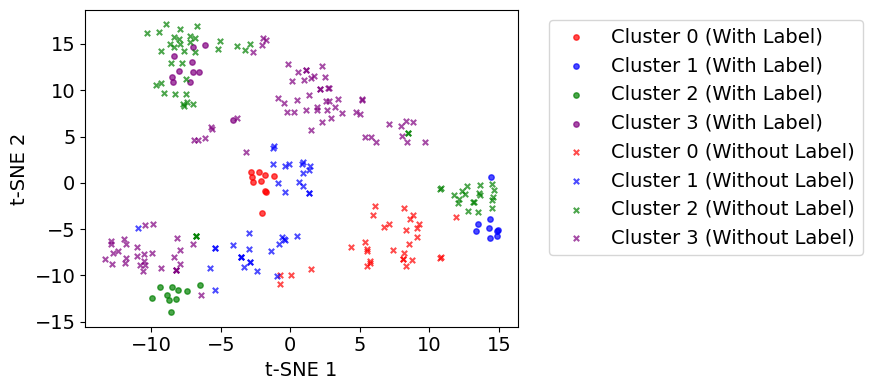

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Use t-SNE to reduce the dimensionality of the data.
tsne = TSNE(n_components=2, random_state=42)
data_combined_tsne = tsne.fit_transform(data_combined[numeric_columns])

# Create a DataFrame for t-SNE results.data_combined['tsne-2d-one'] = data_combined_tsne[:,0]

data_combined['tsne-2d-one'] = data_combined_tsne[:,0]
data_combined['tsne-2d-two'] = data_combined_tsne[:,1]

# Separate data with and without labels
data_with_label = data_combined[~data_combined['Label'].isna()]
data_without_label = data_combined[data_combined['Label'].isna()]

# Adjust the Cluster name of the data with Label as requested.
data_with_label['Adjusted Cluster'] = data_with_label['Cluster'].replace({0: 1, 1: 0, 2: 2, 3: 3})

# Create t-SNE graphs with different markers and colors, and adjust Cluster names.
plt.figure(figsize=(10, 4))

# Set color for each cluster
colors = ['red', 'blue', 'green', 'purple']
clusters = [0, 1, 2, 3]

text_size = 14
marker_size = 15

# Draw a graph for data with labels (adjust cluster names)
for cluster, color in zip(clusters, colors):
    subset = data_with_label[data_with_label['Adjusted Cluster'] == cluster]
    plt.scatter(subset['tsne-2d-one'], subset['tsne-2d-two'],
                c=color, marker='o', s = marker_size, label=f'Cluster {cluster} (With Label)', alpha=0.7)

# Draw a graph for data without labels.
for cluster, color in zip(clusters, colors):
    subset = data_without_label[data_without_label['Cluster'] == cluster]
    plt.scatter(subset['tsne-2d-one'], subset['tsne-2d-two'],
                c=color, marker='x', s = marker_size, label=f'Cluster {cluster} (Without Label)', alpha=0.7)

#plt.title("t-SNE visualization of Clusters with Adjusted Labels")
plt.xlabel("t-SNE 1", fontsize = text_size)
plt.ylabel("t-SNE 2", fontsize = text_size)
plt.xticks(fontsize = text_size)
plt.yticks(fontsize = text_size)
plt.legend(fontsize = text_size, bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('tsne.jpg', dpi=300)
plt.show()

C:\Users\Pansri San\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pansri San\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Labeled Data Metrics:
Purity: 0.9773
Normalized Mutual Information (NMI): 0.9404

Unlabeled Data Metrics:
Silhouette Score: 0.2636
Calinski-Harabasz Index: 69.0746


C:\Users\Pansri San\AppData\Local\Temp\ipykernel_7824\2498124541.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_label['Adjusted Cluster'] = data_with_label['Cluster'].replace({0: 2, 1: 0, 2: 1, 3: 3})


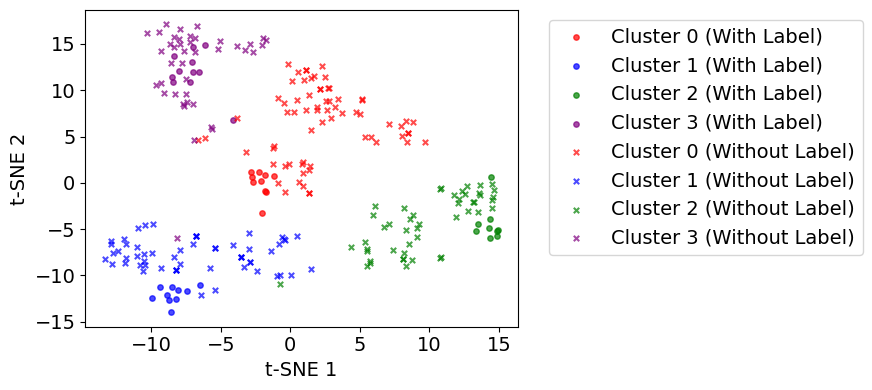

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, normalized_mutual_info_score
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# Load CSV file
file_path = 'Demo_KNN.csv'
data = pd.read_csv(file_path)
# Separate data with and without labels
data_labeled = data.dropna(subset=['Label'])
data_unlabeled = data[data['Label'].isna()]
# Select only the columns that contain numeric values (except the Label column).
numeric_columns = data.columns.drop(['uuid', 'Label'])
# Unlabeled data preprocessing
Q1_unlabeled = data_unlabeled[numeric_columns].quantile(0.25)
Q3_unlabeled = data_unlabeled[numeric_columns].quantile(0.75)
data_unlabeled_clipped = data_unlabeled.copy()
for col in numeric_columns:
    data_unlabeled_clipped[col] = data_unlabeled[col].clip(lower=Q1_unlabeled[col], upper=Q3_unlabeled[col])
scaler = StandardScaler()
data_unlabeled_standardized = data_unlabeled_clipped.copy()
data_unlabeled_standardized[numeric_columns] = scaler.fit_transform(data_unlabeled_clipped[numeric_columns])
kmeans = KMeans(n_clusters=4, n_init=20, max_iter=500, tol=1e-5, random_state=42)
data_unlabeled_standardized['Cluster'] = kmeans.fit_predict(data_unlabeled_standardized[numeric_columns])


# Labeled data preprocessing
data_labeled_standardized = data_labeled.copy()
data_labeled_standardized[numeric_columns] = scaler.fit_transform(data_labeled[numeric_columns])
kmeans_labeled = KMeans(n_clusters=4, random_state=42)
data_labeled_standardized['Cluster'] = kmeans_labeled.fit_predict(data_labeled_standardized[numeric_columns])
# Compute Purity for labeled data
def compute_purity(true_labels, predicted_clusters):
    df = pd.DataFrame({'true': true_labels, 'predicted': predicted_clusters})
    cluster_purity = df.groupby('predicted')['true'].apply(lambda x: x.value_counts().max() / len(x))
    return cluster_purity.mean()
true_labels_labeled = data_labeled_standardized['Label']
predicted_clusters_labeled = data_labeled_standardized['Cluster']
purity_labeled = compute_purity(true_labels_labeled, predicted_clusters_labeled)
nmi_labeled = normalized_mutual_info_score(true_labels_labeled, predicted_clusters_labeled)
print("\nLabeled Data Metrics:")
print(f"Purity: {purity_labeled:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_labeled:.4f}")
# Compute Silhouette Score and Calinski-Harabasz Index for unlabeled data
silhouette_avg_unlabeled = silhouette_score(data_unlabeled_standardized[numeric_columns], data_unlabeled_standardized['Cluster'])
calinski_harabasz_index_unlabeled = calinski_harabasz_score(data_unlabeled_standardized[numeric_columns], data_unlabeled_standardized['Cluster'])
print("\nUnlabeled Data Metrics:")
print(f"Silhouette Score: {silhouette_avg_unlabeled:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_index_unlabeled:.4f}")
# Combine data for visualization
data_combined = pd.concat([data_unlabeled_standardized, data_labeled_standardized], ignore_index=True)
# Use t-SNE to reduce the dimensionality of the data
tsne = TSNE(n_components=2, random_state=42)
data_combined_tsne = tsne.fit_transform(data_combined[numeric_columns])
data_combined['tsne-2d-one'] = data_combined_tsne[:, 0]
data_combined['tsne-2d-two'] = data_combined_tsne[:, 1]
# Separate data with and without labels
data_with_label = data_combined[~data_combined['Label'].isna()]
data_without_label = data_combined[data_combined['Label'].isna()]
# Adjust the Cluster name of the data with Label as requested
data_with_label['Adjusted Cluster'] = data_with_label['Cluster'].replace({0: 2, 1: 0, 2: 1, 3: 3})
# Create t-SNE graphs with different markers and colors, and adjust Cluster names
plt.figure(figsize=(10, 4))
colors = ['red', 'blue', 'green', 'purple']
clusters = [0, 1, 2, 3]
text_size = 14
marker_size = 15
# Draw a graph for data with labels (adjust cluster names)
for cluster, color in zip(clusters, colors):
    subset = data_with_label[data_with_label['Adjusted Cluster'] == cluster]
    plt.scatter(subset['tsne-2d-one'], subset['tsne-2d-two'],
                c=color, marker='o', s=marker_size, label=f'Cluster {cluster} (With Label)', alpha=0.7)
# Draw a graph for data without labels
for cluster, color in zip(clusters, colors):
    subset = data_without_label[data_without_label['Cluster'] == cluster]
    plt.scatter(subset['tsne-2d-one'], subset['tsne-2d-two'],
                c=color, marker='x', s=marker_size, label=f'Cluster {cluster} (Without Label)', alpha=0.7)
plt.xlabel("t-SNE 1", fontsize=text_size)
plt.ylabel("t-SNE 2", fontsize=text_size)
plt.xticks(fontsize=text_size)
plt.yticks(fontsize=text_size)
plt.legend(fontsize=text_size, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('tsne.jpg', dpi=300)
plt.show()

** Outlier Removal (IQR)
Reason: Removing outliers reduces unwanted variability in the data, improving the performance of clustering algorithms like K-Means, as outliers can skew the cluster formation.

** MinMaxScaler
Reason: MinMaxScaler normalizes the data to a [0, 1] range, ensuring that all features contribute equally to the clustering process in K-Means. This prevents features with larger values from dominating the clustering results.

** PCA 
Reason: PCA is used to reduce the dimensionality of the data while retaining most of the variance. This reduction makes K-Means more efficient and reduces the computational time.

**K-Means Clustering
Reason: K-Means is a widely used clustering algorithm due to its simplicity and effectiveness. The parameters n_init, max_iter, and tol are set to ensure stable and accurate results

C:\Users\Pansri San\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pansri San\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pansri San\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pansri San\AppData\Roaming\Python\Python311\site-packag

Random State: 0, Inertia: 13.555720091497669
Random State: 42, Inertia: 13.555720091497669


C:\Users\Pansri San\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pansri San\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Random State: 99, Inertia: 13.555720091497669
Random State: 123, Inertia: 13.555720091497669

Labeled Data Metrics:
Purity: 0.9286
Normalized Mutual Information (NMI): 0.8177

Unlabeled Data Metrics:
Silhouette Score: 0.5409
Calinski-Harabasz Index: 124.1805
Davies-Bouldin Index: 0.9718


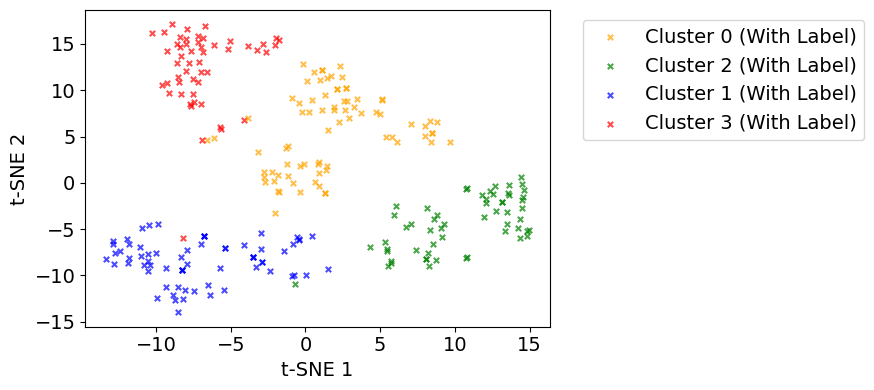

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, normalized_mutual_info_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load CSV file
file_path = 'Demo_KNN.csv'
data = pd.read_csv(file_path)

# Separate data with and without labels
data_labeled = data.dropna(subset=['Label'])
data_unlabeled = data[data['Label'].isna()]

# Select only the columns that contain numeric values (except the Label column).
numeric_columns = data.columns.drop(['uuid', 'Label'])
Q1 = data_unlabeled[numeric_columns].quantile(0.25)
Q3 = data_unlabeled[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# edge limit outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# cut outliers
data_unlabeled_no_outliers = data_unlabeled[~((data_unlabeled[numeric_columns] < lower_bound) | (data_unlabeled[numeric_columns] > upper_bound)).any(axis=1)]
data_labeled_no_outliers = data_labeled[~((data_labeled[numeric_columns] < lower_bound) | (data_labeled[numeric_columns] > upper_bound)).any(axis=1)]


# Unlabeled data preprocessing
scaler = MinMaxScaler()
data_unlabeled_standardized = data_unlabeled.copy()
data_unlabeled_standardized[numeric_columns] = scaler.fit_transform(data_unlabeled[numeric_columns])

# Labeled data preprocessing
data_labeled_standardized = data_labeled.copy()
data_labeled_standardized[numeric_columns] = scaler.transform(data_labeled[numeric_columns])

# Reduce dimensionality using PCA
pca = PCA(n_components=0.95, random_state=42)
data_unlabeled_pca = pca.fit_transform(data_unlabeled_standardized[numeric_columns])
data_labeled_pca = pca.transform(data_labeled_standardized[numeric_columns])

# K-Means Clustering on unlabeled data
kmeans = KMeans(n_clusters=4, n_init=50, max_iter=1000, tol=1e-6, random_state=42)
data_unlabeled_standardized['Cluster'] = kmeans.fit_predict(data_unlabeled_pca)

# K-Means Clustering on labeled data
kmeans_labeled = KMeans(n_clusters=4, n_init=50, max_iter=1000, tol=1e-6, random_state=42)
data_labeled_standardized['Cluster'] = kmeans_labeled.fit_predict(data_labeled_pca)

for seed in [0, 42, 99, 123]:
    kmeans = KMeans(n_clusters=4, n_init=50, max_iter=1000, random_state=seed)
    labels = kmeans.fit_predict(data_unlabeled_pca)
    print(f"Random State: {seed}, Inertia: {kmeans.inertia_}")

# Compute Purity and NMI for labeled data
def compute_purity(true_labels, predicted_clusters):
    df = pd.DataFrame({'true': true_labels, 'predicted': predicted_clusters})
    cluster_purity = df.groupby('predicted')['true'].apply(lambda x: x.value_counts().max() / len(x))
    return cluster_purity.mean()

true_labels_labeled = data_labeled_standardized['Label']
predicted_clusters_labeled = data_labeled_standardized['Cluster']
purity_labeled = compute_purity(true_labels_labeled, predicted_clusters_labeled)
nmi_labeled = normalized_mutual_info_score(true_labels_labeled, predicted_clusters_labeled)

# Compute additional metrics for unlabeled data
silhouette_avg_unlabeled = silhouette_score(data_unlabeled_pca, data_unlabeled_standardized['Cluster'])
calinski_harabasz_index_unlabeled = calinski_harabasz_score(data_unlabeled_pca, data_unlabeled_standardized['Cluster'])
davies_bouldin_index_unlabeled = davies_bouldin_score(data_unlabeled_pca, data_unlabeled_standardized['Cluster'])

print("\nLabeled Data Metrics:")
print(f"Purity: {purity_labeled:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_labeled:.4f}")

print("\nUnlabeled Data Metrics:")
print(f"Silhouette Score: {silhouette_avg_unlabeled:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_index_unlabeled:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_index_unlabeled:.4f}")

# Combine data for visualization
data_combined = pd.concat([data_unlabeled_standardized, data_labeled_standardized], ignore_index=True)

# Use t-SNE to reduce the dimensionality of the data for visualization
tsne = TSNE(n_components=2, random_state=42)
data_combined_tsne = tsne.fit_transform(data_combined[numeric_columns])
data_combined['tsne-2d-one'] = data_combined_tsne[:, 0]
data_combined['tsne-2d-two'] = data_combined_tsne[:, 1]

# Create t-SNE visualization
plt.figure(figsize=(10, 4))
colors = ['orange', 'green', 'blue', 'red']
clusters = [0, 2, 1, 3]

# Draw a graph for data with labels (adjust cluster names)
for cluster, color in zip(clusters, colors):
    subset = data_with_label[data_with_label['Adjusted Cluster'] == cluster]
    plt.scatter(subset['tsne-2d-one'], subset['tsne-2d-two'],
                c=color, marker='x', s=marker_size, label=f'Cluster {cluster} (With Label)', alpha=0.7)
# Draw a graph for data without labels
for cluster, color in zip(clusters, colors):
    subset = data_without_label[data_without_label['Cluster'] == cluster]
    plt.scatter(subset['tsne-2d-one'], subset['tsne-2d-two'],
                c=color, marker='x', s=marker_size, alpha=0.7)
plt.xlabel("t-SNE 1", fontsize=text_size)
plt.ylabel("t-SNE 2", fontsize=text_size)
plt.xticks(fontsize=text_size)
plt.yticks(fontsize=text_size)
plt.legend(fontsize=text_size, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('tsne.jpg', dpi=300)
plt.show()
